Pour ce premier exercie nous utiliserons ce notebook dont l'objectif sera de réaliser une analyse exploratoire du jeu de données Wines.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize']=(12,8)

column_names = [
    'target', 
    'alcohol', 
    'malic_acid', 
    'ash', 
    'alcalinity_of_ash', 
    'magnesium', 
    'total_phenols', 
    'flavanoids', 
    'nonflavanoid_phenols', 
    'proanthocyanins', 
    'color_intensity', 
    'hue', 
    'od280/od315_of_diluted_wines', 
    'proline'
]

try:
    df_wine=pd.read_csv('../data/wine.csv', header=None, names=column_names)
except FileNotFoundError:
    print("Le dataset n'est pas trouve")

In [14]:
print("--- Apercu des donnees")
display(df_wine.head())

print("\n--- Informations sur les donnees")
df_wine.info()

--- Apercu des donnees


,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



--- Informations sur les donnees
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   target                        178 non-null    int64  
 1   alcohol                       178 non-null    float64
 2   malic_acid                    178 non-null    float64
 3   ash                           178 non-null    float64
 4   alcalinity_of_ash             178 non-null    float64
 5   magnesium                     178 non-null    int64  
 6   total_phenols                 178 non-null    float64
 7   flavanoids                    178 non-null    float64
 8   nonflavanoid_phenols          178 non-null    float64
 9   proanthocyanins               178 non-null    float64
 10  color_intensity               178 non-null    float64
 11  hue                           178 non-null    float64
 12  od280/od315_of_diluted_wines  

Le jeu de données contient 178 observations et 14 variables. Toutes les variables, y compris la variable cible, sont de type numérique (int64 ou float64).

In [17]:
print("--- Les valeurs manquantes")
print(df_wine.isnull().sum())

print("--- Les lignes dupliquees")
print(f"Il y a {df_wine.duplicated().sum()} lignes entièrement dupliquées.")

--- Les valeurs manquantes
target                          0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64
--- Les lignes dupliquees
Il y a 0 lignes entièrement dupliquées.


Le jeu de données est parfaitement complet. Aucune colonne ne contient de valeur manquante (NaN).Il n'y a aucune ligne dupliquée. Chaque observation est unique

In [19]:
print("--- Les statistiques descriptives")
display(df_wine.describe().T)

--- Les statistiques descriptives


,count,mean,std,min,25%,50%,75%,max
target,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


**Échelles** : Les variables ont des échelles très différentes. Par exemple, magnesium a une moyenne d'environs 99, tandis que la variable malic_acid a une moyenne de d'environs 2.3. Cela confirme un déséquilibre dans les donnees.

/tmp/ipykernel_25718/24607349.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_wine, palette='viridis')


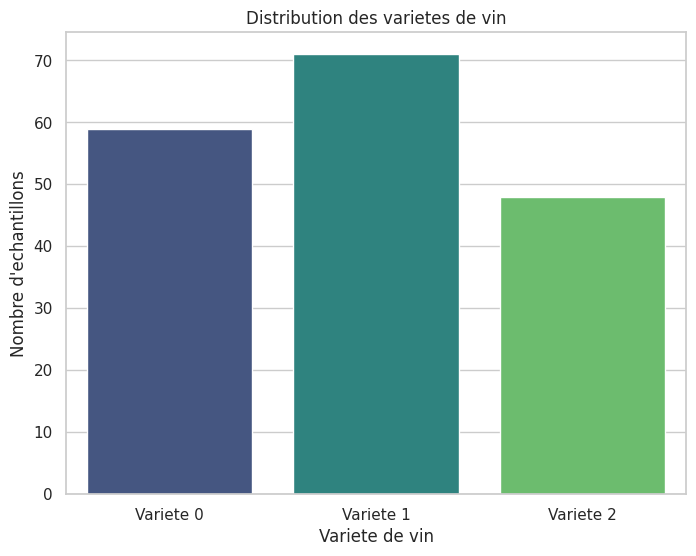

Nombre d'echantillons par variete: 
target
2    71
1    59
3    48
Name: count, dtype: int64


In [20]:
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=df_wine, palette='viridis')
plt.title('Distribution des varietes de vin')
plt.xlabel("Variete de vin")
plt.ylabel("Nombre d'echantillons")
plt.xticks(ticks=[0, 1, 2], labels=['Variete 0', 'Variete 1', 'Variete 2'])
plt.show()

print("Nombre d'echantillons par variete: ")
print(df_wine['target'].value_counts())

Ceci nous indique que le jeu de données n'est pas trop déséquilibré. La variété 1 est la plus représentée (71 échantillons), mais les autres classes (0 et 2) ont des effectifs conséquents (59 et 48).

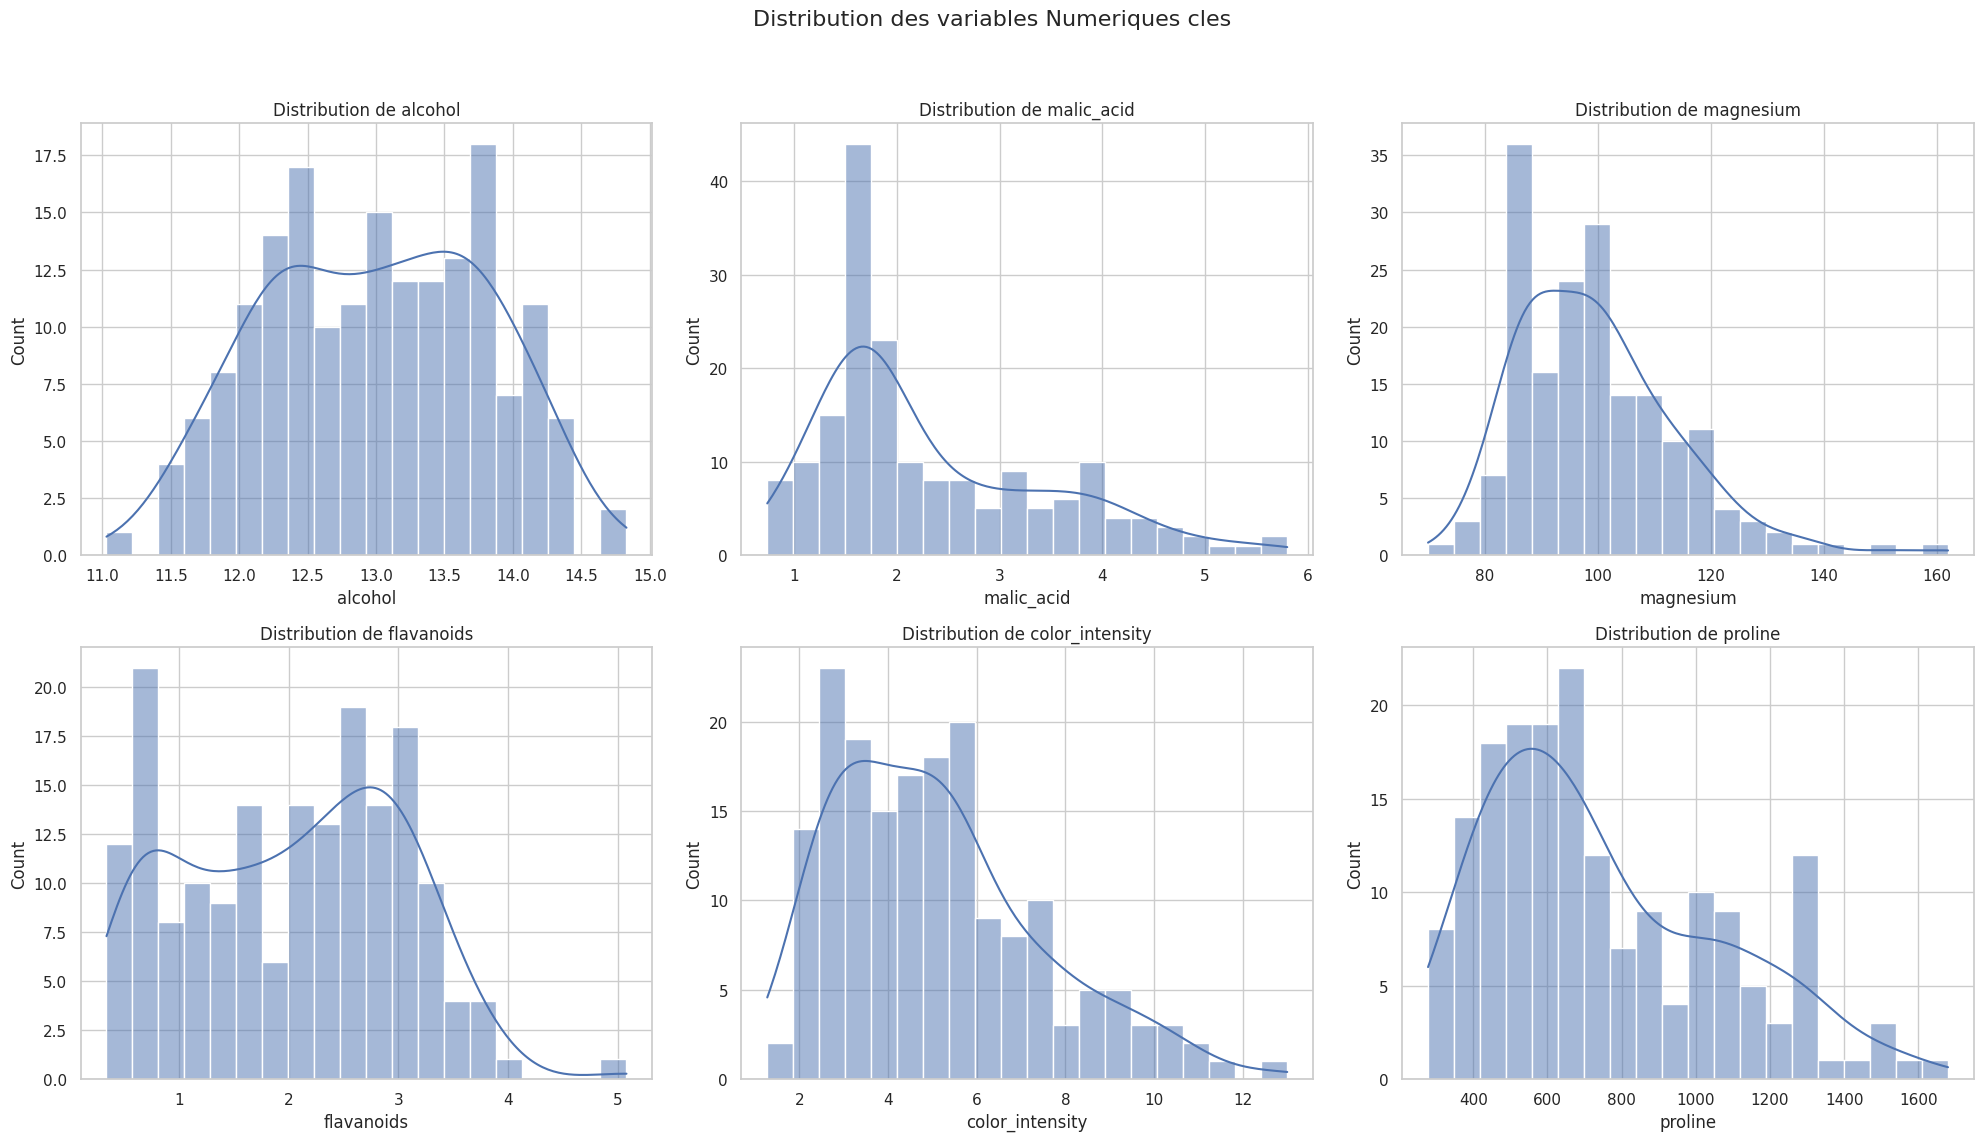

In [22]:
features_to_analyze=['alcohol', 'malic_acid', 'magnesium', 'flavanoids', 'color_intensity', 'proline']

fig, axes= plt.subplots(nrows=2, ncols=3, figsize=(20,12))
fig.suptitle('Distribution de quelques variables', fontsize=16)

for i, feature in enumerate(features_to_analyze):
    row=i//3
    col=i % 3
    sns.histplot(df_wine[feature], kde=True, ax=axes[row, col], bins=20)
    axes[row, col].set_title(f'Distribution de {feature}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Alcohol et Flavanoids**: Les distributions sont approximativement symétriques et unimodales, s'apparentant à une distribution normale.

**Malic Acid et Color Intensity**: Ces variables présentent une forte asymétrie positive, indiquant une concentration des valeurs faibles et la présence de quelques valeurs élevées (outliers) sur la droite.

**Magnesium**: La distribution est multimodale (plusieurs pics), ce qui suggère que l'échantillon de données pourrait être composé de sous-populations distinctes nécessitant une analyse de segmentation.

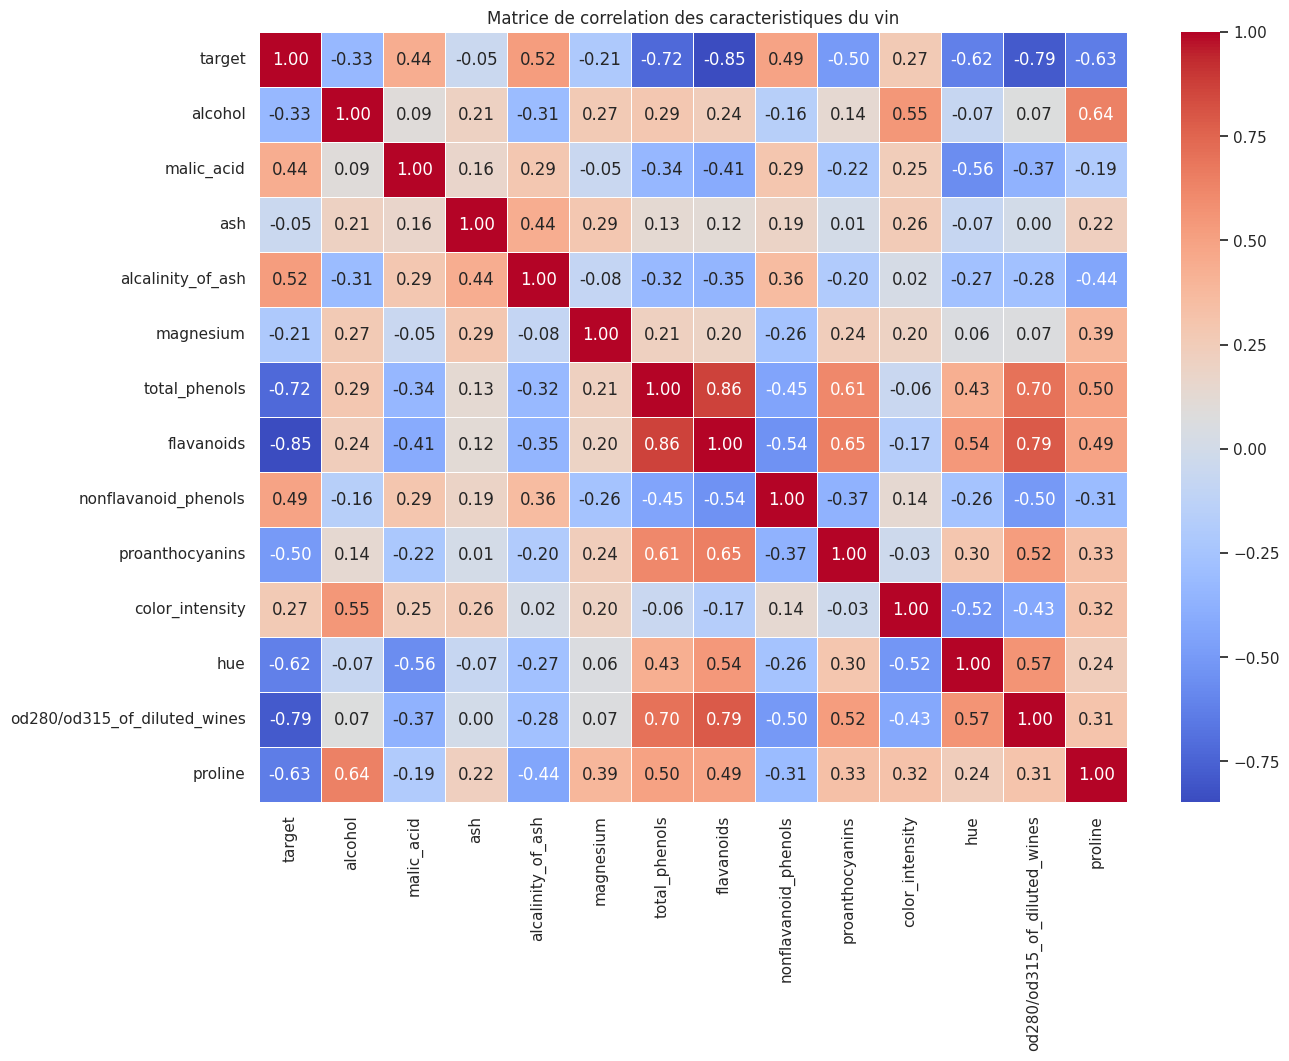

In [25]:
correlation_matrix= df_wine.corr()

plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de correlation des caracteristiques du vin')
plt.show()

**Fortes corrélations positives**: On observe une corrélation positive quasi parfaite entre flavanoids et total_phenols (ρ=0.86). Ce lien est attendu (les flavonoïdes sont une sous-classe des phénols), mais il indique une forte redondance des informations. Pour la modélisation, on peut considérer une sélection de variables pour n'en retenir qu'une et éviter la multicolinéarité.

**Corrélation avec la cible**: Les variables flavanoids (ρ=−0.85), od280/od315_of_diluted_wines (ρ=−0.79) et total_phenols (ρ=−0.72) présentent les corrélations négatives les plus fortes avec la variable cible. Cela établit qu'une hausse de ces composés est un indicateur puissant d'appartenance à la Classe 0.

alcalinity_of_ash (ρ=0.52) est la variable la plus fortement corrélée positivement avec la cible. Cela signifie qu'une augmentation de l'alcalinité des cendres est un bon prédicteur d'appartenance à la Classe 2, indiquant une différence minérale notable entre les types de vins.

/tmp/ipykernel_25718/3090724539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df_wine, ax=axes[i], palette='viridis')
/tmp/ipykernel_25718/3090724539.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Variété 0', 'Variété 1', 'Variété 2'])
/tmp/ipykernel_25718/3090724539.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df_wine, ax=axes[i], palette='viridis')
/tmp/ipykernel_25718/3090724539.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoca

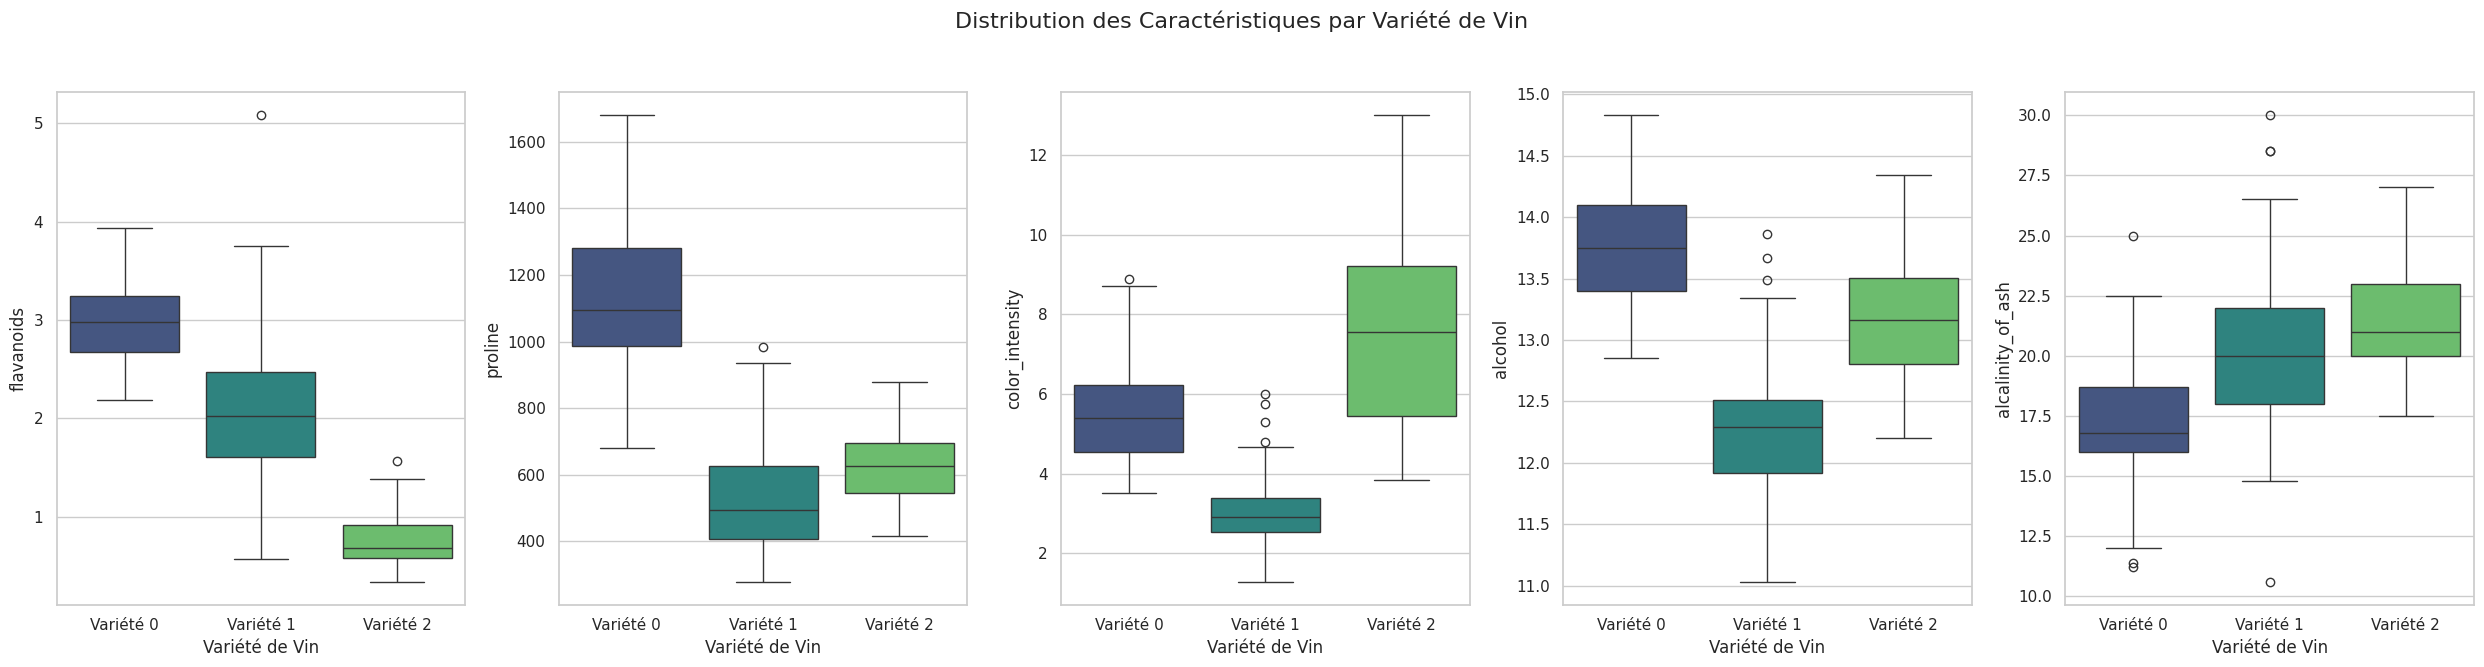

In [26]:
discriminant_features = ['flavanoids', 'proline', 'color_intensity', 'alcohol', 'alcalinity_of_ash']

fig, axes = plt.subplots(nrows=1, ncols=len(discriminant_features), figsize=(25, 7))
fig.suptitle('Distribution des Caractéristiques par Variété de Vin', fontsize=16)

for i, feature in enumerate(discriminant_features):
    sns.boxplot(x='target', y=feature, data=df_wine, ax=axes[i], palette='viridis')
    axes[i].set_xlabel('Variété de Vin')
    axes[i].set_xticklabels(['Variété 0', 'Variété 1', 'Variété 2'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Les boxplots groupés confirment de manière très claire les résultats de la matrice de corrélation. La variable flavanoids permet de séparer presque parfaitement la variété 0 des deux autres. De même, proline et alcohol montrent des distributions très distinctes entre les trois variétés.

Ces variables seront extrêmement importantes pour un modèle de classification.

Le pairplot renforce cette idée. Sur le nuage de points alcohol vs flavanoids, on voit trois groupes de couleurs (les trois variétés) qui sont visuellement bien séparés.Cette séparation nette suggère qu'un modèle de classification (comme les SVM, les arbres de décision ou même le K-Voisins le plus proche) devrait atteindre de très bonnes performances sur ce jeu de données.